In [9]:
import os, sys
import gymnasium as gym
import time
import numpy as np
import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import text_flappy_bird_gym
from Agents.SarsaLambdaAgent import SarsaLambdaAgent
from Src.utils import *

# Sarsa

## Training

  0%|          | 0/10000 [00:00<?, ?it/s]

Training completed. The agent has learned a policy!


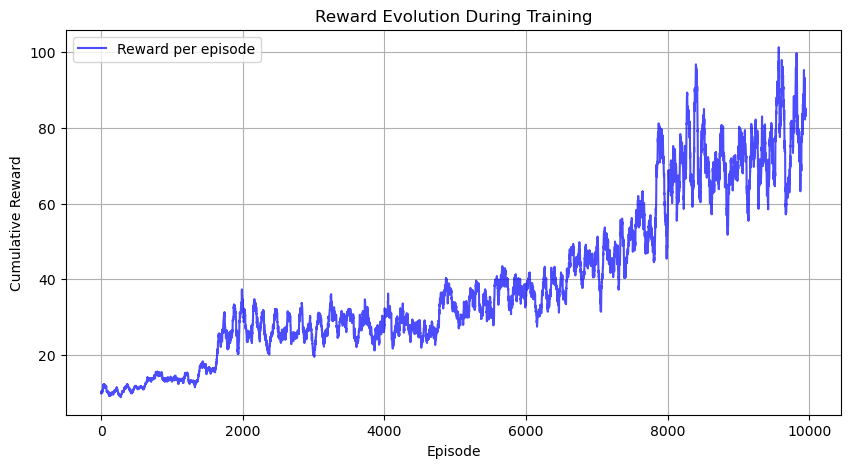

In [10]:
if __name__ == '__main__':
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
    
    # Get the size of the action space
    action_size = env.action_space.n
    state_shape = (14, 22)  # Tuple observation space: Discrete(14), Discrete(22)
    
    # Initialize the Sarsa(λ) agent with the necessary parameters
    agent = SarsaLambdaAgent(state_size=state_shape, action_size=action_size, alpha=0.1, gamma=0.96, lambd=0.9, epsilon=1.0)

    num_episodes = 10000  # Number of training episodes
    reward_history = []

    epsilon_min = 0.01  # Minimum exploration
    epsilon_decay = 0.995  # Gradual reduction

    for episode in tqdm(range(num_episodes)):
        obs, _ = env.reset()
        trajectory = []  # Stores (state, action, reward)
        done = False
        total_reward = 0

        # Initialize the action using the selection method
        action = agent.select_action(obs)

        while not done:
            next_obs, reward, done, _, info = env.step(action)
            next_action = agent.select_action(next_obs)

            # Add the transition to the trajectory
            trajectory.append((obs, action, reward))

            # Update the agent using the transition
            agent.update_policy(obs, action, reward, next_obs, next_action, done)

            obs = next_obs
            action = next_action
            total_reward += reward

        reward_history.append(total_reward)

        # Gradually reduce exploration
        agent.epsilon = max(epsilon_min, agent.epsilon * epsilon_decay)

    print("Training completed. The agent has learned a policy!")

    # Display the average rewards
    smoothed_rewards = moving_average(reward_history, window_size=50)
    plot_rewards(smoothed_rewards)

## Results

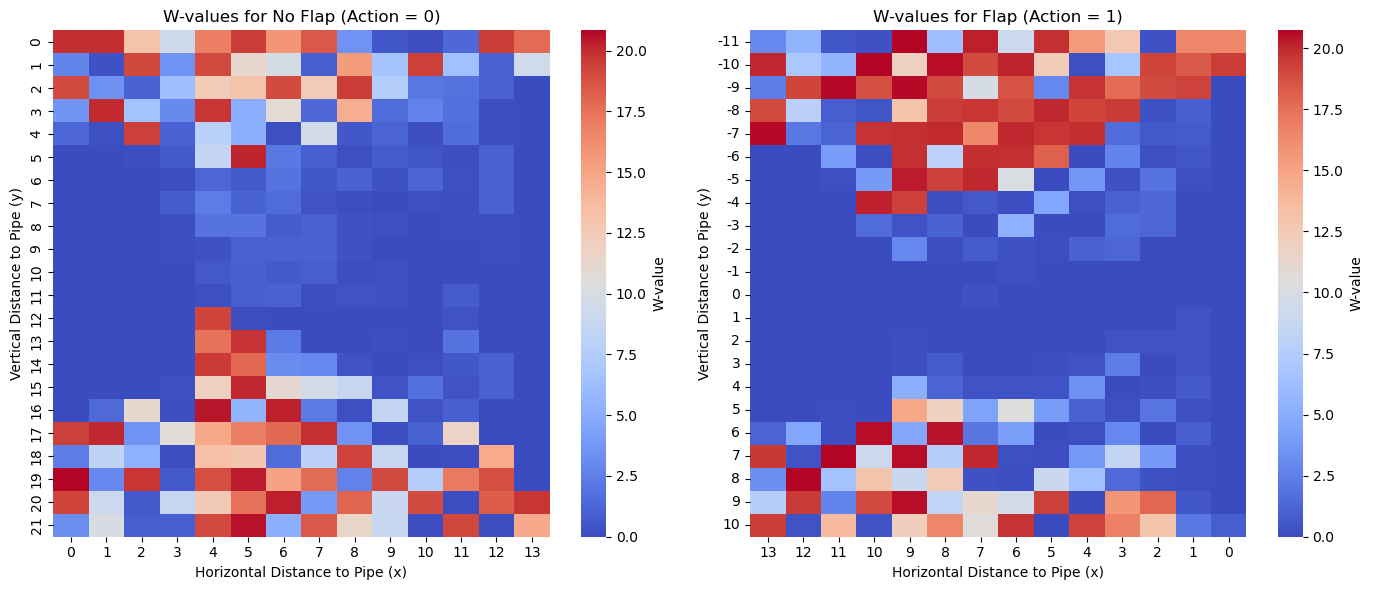

In [11]:
plot_w_values(agent.w)

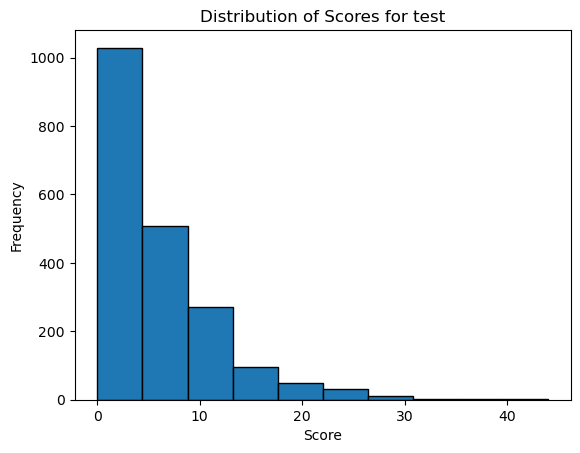

In [12]:
scores = []

for i in range(2000):

  obs, _ = env.reset()
  done = False

  while not done:
      # Select best action
      state = tuple(obs)

      action = agent.select_action(obs)

      obs, reward, done, _, info = env.step(action)
  scores.append(info["score"])

env.close()

plt.hist(scores, bins=10, edgecolor="black")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for test")
plt.show()